# Face Detection

In [2]:
import cv2
import matplotlib.pyplot as plt


In [3]:
cv2.imread('group-photo.jpg')

array([[[129, 201, 243],
        [105, 185, 226],
        [ 68, 161, 200],
        ...,
        [145, 195, 217],
        [150, 200, 223],
        [154, 204, 227]],

       [[116, 185, 228],
        [100, 179, 220],
        [ 79, 170, 209],
        ...,
        [144, 194, 216],
        [148, 198, 221],
        [151, 201, 224]],

       [[102, 167, 211],
        [ 91, 165, 207],
        [ 79, 167, 204],
        ...,
        [143, 192, 214],
        [144, 194, 217],
        [146, 196, 219]],

       ...,

       [[118, 166, 194],
        [113, 161, 189],
        [103, 153, 181],
        ...,
        [ 40,  64,  88],
        [ 40,  63,  85],
        [ 40,  63,  85]],

       [[125, 172, 200],
        [117, 165, 193],
        [105, 155, 183],
        ...,
        [ 39,  63,  87],
        [ 38,  61,  83],
        [ 38,  61,  83]],

       [[132, 179, 207],
        [121, 169, 197],
        [110, 158, 186],
        ...,
        [ 37,  61,  85],
        [ 37,  60,  82],
        [ 36,  59,  81]]

In [5]:
img = plt.imread('group-photo.jpg')

In [6]:
img.shape

(500, 700, 3)

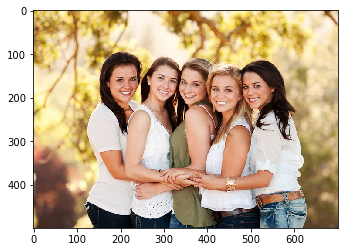

In [7]:
plt.imshow(img)

In [8]:
detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [9]:
detector

<CascadeClassifier 00000248AB7EC1B0>

In [17]:
all_faces = detector.detectMultiScale(img, 1.3,5)

In [18]:
all_faces

array([[172, 130,  80,  80],
       [269, 131,  75,  75],
       [396, 152,  80,  80],
       [327, 142,  71,  71],
       [469, 147,  75,  75]])

In [19]:
all_faces.shape

(5, 4)

In [21]:
x,y,w,h = all_faces[0]

In [24]:
img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

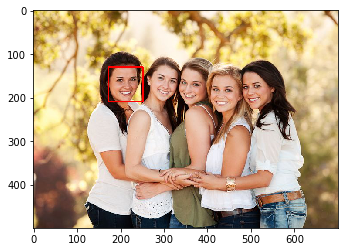

In [25]:
plt.imshow(img)

In [27]:
for face in all_faces:
    x,y,w,h = face
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
    

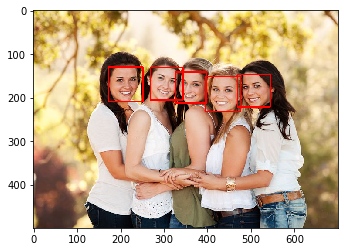

In [28]:
plt.imshow(img)

In [29]:
# Face detection in real_time

In [2]:
import cv2

In [3]:
detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
cam = cv2.VideoCapture(0)
while True:
    ret, frame = cam.read()
    
    if ret==False:
        continue
    
    all_faces = detector.detectMultiScale(frame,1.5,5)
    
    for face in all_faces:
        x,y,w,h = face
        frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        
    cv2.imshow("Face_Detection",frame)
    key_pressed = cv2.waitKey(1) & 0xFF
    
    if key_pressed==ord('q'):
        break
 
cam.release()
cv2.destroyAllWindows()
        

# Smile Detector 

In [7]:
import cv2
import matplotlib.pyplot as plt


In [13]:
detector = cv2.CascadeClassifier('haarcascade_smile.xml')

In [15]:
cam = cv2.VideoCapture(0)

while True:
    
    ret, frame = cam.read()
    
    if ret == False:
        continue
        
    all_smiles = detector.detectMultiScale(frame, 1.5, 70)
    
    sorted_smile = sorted(all_smiles, key = lambda s: s[-1]*s[-2] )
    
    if sorted_smile:
        x,y,w,h = sorted_smile[0]
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255), 2 )
        
    cv2.imshow("Smile Detector", frame)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()